In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline




In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
print(data.shape)

(506, 13)


In [4]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
     # You should probably not use this dataset.
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [5]:
boston=load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
data = boston.data
target = boston.target

In [8]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
X = pd.DataFrame(data, columns=feature_names)

In [10]:
y = pd.DataFrame(target, columns = ['price'] )

## Splitting X, y into training and test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train) )

In [15]:
y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train) )

In [16]:
 
from sklearn.manifold import TSNE
#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate=250, random_state=42,
init='random', perplexity=3).fit_transform(X_train_scaled)
X_embedded.shape

(404, 2)

[Text(0.5, 1.0, 'Boston data T-SNE projection')]

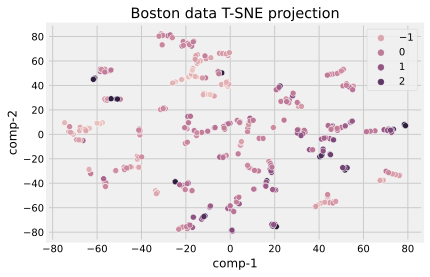

In [17]:
df = pd.DataFrame()
df["y"] = y_train_scaled
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                
                data=df).set(title="Boston data T-SNE projection") 

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)

In [19]:
train_labels = model.fit_predict(X_train_scaled)

In [20]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [21]:
centers = scaler.inverse_transform(model.cluster_centers_)

In [22]:
centers[:, 1]

array([18.13325578, 37.3143899 , 19.36041353])

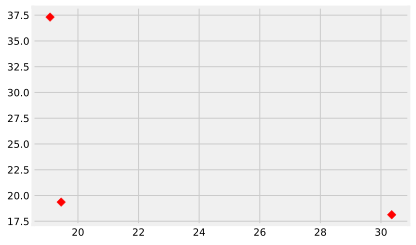

In [76]:
 
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [24]:
centers

array([[30.35463448, 18.13325578, 33.3195024 , 23.61641597, 33.4721765 ,
        18.16785354, 30.05843183, 14.80143877, 34.37715186, 35.02862036,
        28.42374081, 16.67000097, 31.18709428],
       [19.07888498, 37.3143899 , 13.32105152, 21.88405151, 12.43603653,
        27.17198697, 10.52821978, 36.12573132, 17.29295523, 17.34270015,
        17.17902304, 26.10066119, 15.07888392],
       [19.4449074 , 19.36041353, 20.06603542, 22.66223425, 20.36300755,
        23.90414514, 23.49189663, 22.11101771, 17.57438515, 17.11881153,
        21.58423527, 25.38247652, 20.6924346 ]])

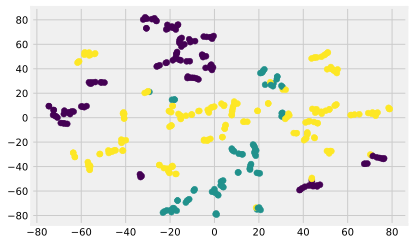

In [25]:
plt.scatter(  X_embedded[:,0],   X_embedded[:,1], c=train_labels)
#plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')


In [26]:
train_labels.shape

(404,)

In [27]:
X_train_scaled.shape

(404, 13)

In [42]:
X_train.shape

(404, 13)

In [41]:
itemindexCRIM = np.where(feature_names == "CRIM")
index_crim = itemindexCRIM[0][0]
index_crim

0

In [38]:
y_train.shape

(404, 1)

In [65]:
 train_labels

array([0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2,

In [89]:
aver_crim = [0,0,0]
aver_price = [0,0,0]
cnt= [0,0,0]

print('Calculating average values of Price and CRIM:\r\n')
for i in range(0,len(train_labels)):
    #print(i)
    lb =  train_labels[i]
    
    aver_crim[lb]=aver_crim[lb]+np.array(X_train)[i][index_crim]
    aver_price[lb]=aver_price[lb]+np.array(y_train)[i]
    cnt[lb]=cnt[lb]+1
    
for i in range(0,len(cnt)):
    aver_crim[i]=aver_crim[i]/cnt[i]
    aver_price[i]=aver_price[i]/cnt[i]
    print("cluster %d: average price = %.2f ; average CRIM = %.4f"%(i,aver_price[i],aver_crim[i]))
    
print('\r\nfinal average value arrays:')

aver_crim, aver_price
 

Calculating average values of Price and CRIM:

cluster 0: average price = 16.17 ; average CRIM = 10.7970
cluster 1: average price = 27.79 ; average CRIM = 0.0736
cluster 2: average price = 24.96 ; average CRIM = 0.4217

final average value arrays:


([10.797028425196853, 0.07356558139534886, 0.42166020942408367],
 [array([16.16535433]), array([27.78837209]), array([24.95811518])])